# Introduction

In 'The Goal' by Eli Goldratt the main character, Alex, has a small epiphany when he is leading his son's scout group on a hike. He notices that the line of scouts continuously grows longer i.e. the spaces between the scouts continuously increases. As a consequence the whole group has to sacrifice time to regroup and organise over the greater distance. N.B. in this analogy the path is too narrow for any scout to pass another.

This dilemma is presented as an analogy for the manufacturing plant where Alex works. The progress made by the last scout in the column reresents completed work or 'Throughput'. The space in between scouts represents 'Inventory' (specifically money invested in unfinished products as defined by the book. The cost of running to catchup or stopping to wait is loosely analagous to 'Operational Cost'.

We learn that continuous growth is (almost) unavoidable. In summary, every time a scout stops to adjust his backpack, tie his shoes, look around etc. he delays everyone behind him. If the scout is then capable of moving faster than those behind him only he catches up with the scout in front of him.

Below we write some code to simulate such a column of scouts. In the first simulation there are 10 scouts who start off in positions 0-9. Each scout can cover 1 'metre' in one time unit. Each scout has a probability `p` of not moving in any time unit. We run the simulation for 100 seconds and return the length of the final colume in 'metres'. We run the simulation 1000 times and find that the average length of the colum is approximately 22.5. We plot the average length of the column after x time units. We also plot the average distance covered by the last man in the column.

In [62]:
import random
from collections import namedtuple


MarchResult = namedtuple('MarchResult', ['length', 'last_man_dist'])


def forward_march(p, simtime=100):
    positions = list(range(0,10))
    for i in range(simtime):
        if random.random() < p:
            positions[-1] += 1
        for j in range(8,-1,-1):
            if random.random() < p and (positions[j+1] - positions[j]) > 1:
                positions[j] += 1
    return MarchResult(positions[-1] - positions[0], positions[0])

sum([forward_march(0.9).length for x in range(1000)])/1000
            
            

22.178

In [28]:
import matplotlib.pyplot as plt
import math


def plot_function(f, rg, title="", xlabel="", ylabel="", of_x=True):
    fig, ax = plt.subplots()
    data = [(x, f(x) if of_x else f()) for x in rg]
    ax.plot(
        [x[0] for x in data], 
        [x[1] for x in data])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

    
def calc_ave_length(f, i):
    return sum([f(simtime=i).length for x in range(200)])/200


def calc_ave_dist(f, i):
    return sum([f(simtime=i).last_man_dist for x in range(200)])/200


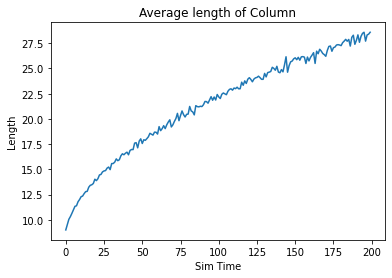

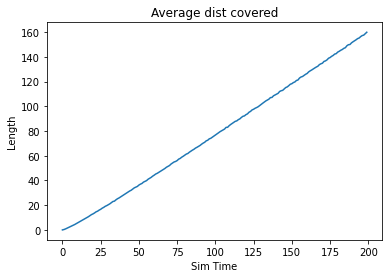

In [64]:

plot_function(
    partial(calc_ave_length, partial(forward_march, p=0.9)), 
    range(200), 
    'Average length of Column', 'Sim Time', 'Length')


plot_function(
    partial(calc_ave_dist, partial(forward_march, p=0.9)), 
    range(200), 
    'Average dist covered', 'Sim Time', 'Length')


# Model 2

In these next simulations the scouts each have a their own speed which they will walk at unless inhibited by a slower scout in front. Again, at each time unit they will stop with a certain probability.

In the first run all the scouts speeds are set to 10.

In the second run all the scouts' speeds are taken randomly from a gaussian distribution and we can see that things are worse. The length of the column increases faster and the distance covered is lower.

In the third run the scouts' speeds are taken randomly from a gaussian distribution but as in The Goal the scouts are first sorted by speed. The length of the column does increase but the growth levels off - a large improvement. However, in this simulation the distance covered does not increase. Nothing has been done about making the slowest scout move faster so that makes sense. There are potential benefits from running the column this way. In the analogy the distance between scouts represents work in progress. In this final run, as the length of the column is smallest, we can say that this exhibits the best control over work in progress. If there is a threshold in the system beyond which no further work in progress can be stored then we will stoppages in work (scouts will stop moving to allow others to catch up). However, still the rate at which work is completed will not change.

In [72]:
def forward_march_speeds(p, simtime=100, speed_f=lambda: 10):
    scout_speeds = [speed_f() for x in range(10)]
    positions = list(range(10))
    for i in range(simtime):
        if random.random() < p:
            positions[-1] += scout_speeds[-1]
        for j in range(8,-1,-1):
            if random.random() < p and (positions[j+1] - positions[j]) > scout_speeds[j]:
                positions[j] += scout_speeds[j]
    return MarchResult(positions[-1] - positions[0], positions[0])

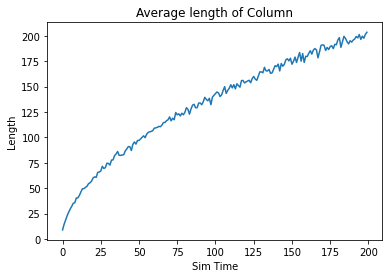

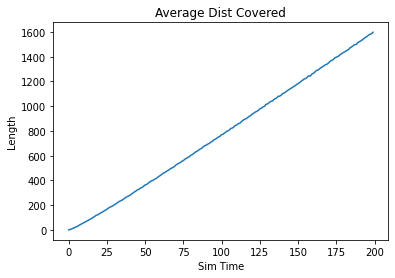

In [66]:
# First Run


plot_function(
    partial(calc_ave_length, partial(forward_march_speeds, p=0.9)), 
    range(200), 
    'Average length of Column', 'Sim Time', 'Length')

plot_function(
    partial(calc_ave_dist, partial(forward_march_speeds, p=0.9)), 
    range(200), 
    'Average Dist Covered', 'Sim Time', 'Length')


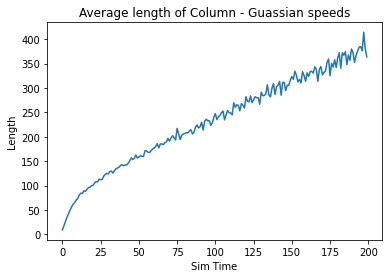

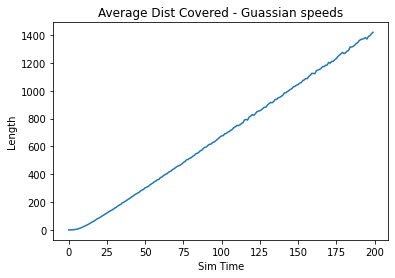

In [69]:
# Second Run - Normally Distributed Speeds


plot_function(
    partial(calc_ave, partial(forward_march_speeds, p=0.9, speed_f=partial(random.gauss, 10, 1))), 
    range(200), 
    'Average length of Column - Guassian speeds', 'Sim Time', 'Length')

plot_function(
    partial(calc_ave_dist, partial(forward_march_speeds, p=0.9, speed_f=partial(random.gauss, 10, 1))), 
    range(200), 
    'Average Dist Covered - Guassian speeds', 'Sim Time', 'Length')


In [ ]:
def forward_march_speeds_sorted(p, simtime=100, speed_f=lambda: 10):
    scout_speeds = [speed_f() for x in range(10)]
    scout_speeds.sort(reverse=True)
    positions = list(range(10))
    for i in range(simtime):
        if random.random() < p:
            positions[-1] += scout_speeds[-1]
        for j in range(8,-1,-1):
            if random.random() < p and (positions[j+1] - positions[j]) > scout_speeds[j]:
                positions[j] += scout_speeds[j]
    return MarchResult(positions[-1] - positions[0], positions[0])


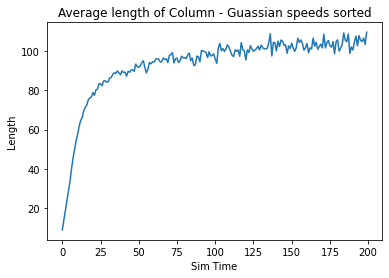

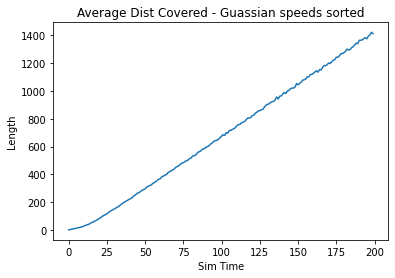

In [71]:
# Third Run - Normally Distributed Speeds, sorted.


plot_function(
    partial(calc_ave_length, partial(forward_march_speeds_sorted, p=0.9, speed_f=partial(random.gauss, 10, 1))), 
    range(200), 
    'Average length of Column - Guassian speeds sorted', 'Sim Time', 'Length')

plot_function(
    partial(calc_ave_dist, partial(forward_march_speeds_sorted, p=0.9, speed_f=partial(random.gauss, 10, 1))), 
    range(200), 
    'Average Dist Covered - Guassian speeds sorted', 'Sim Time', 'Length')


### JUPYTER NOTEBOK USERS

The code for the notebook for this article can be found [here](https://github.com/hugoleeney/jupyter_notebooks/blob/main/The%20Goal%20-%20Eli%20Goldratt/Column%20of%20Marching%20Scouts.ipynb)

#### WARNING

Some fo the code in this notebook is not optimized and runs for a long time.